# Implementando ADALine do zero.

O código abaixo é referente ao EPC 02 da matéria de Inteligência Artificial Aplicada, ministrada pelo professor Filipe Vasconcelos, no curso de Engenharia Elétrica da Universidade Federal de Mato Grosso (UFMT).

O intuito é criar uma rede ADALine que classifique sinais ruidosos para um sistema de controle de válvulas, a fim de confirmar ao sistema comutador se os dados devem ser encaminhados para o comando de ajuste da válvula A ou B.

## Dados de Treinamento

Os dados de treinamento constituíam de 4 características nas 4 primeiras colunas e a saída desejada para cada amostra na última coluna. Para treinamento, foram utilizadas 35 amostras no total.

In [1]:
import numpy as np

data = np.array([
    [ 0.4329, -1.3719,  0.7022, -0.8535,  1.0000],
    [ 0.3024,  0.2286,  0.8630,  2.7909, -1.0000],
    [ 0.1349, -0.6445,  1.0530,  0.5687, -1.0000],
    [ 0.3374, -1.7163,  0.3670, -0.6283, -1.0000],
    [ 1.1434, -0.0485,  0.6637,  1.2606,  1.0000],
    [ 1.3749, -0.5071,  0.4464,  1.3009,  1.0000],
    [ 0.7221, -0.7587,  0.7681, -0.5592,  1.0000],
    [ 0.4403, -0.8072,  0.5154, -0.3129,  1.0000],
    [-0.5231,  0.3548,  0.2538,  1.5776, -1.0000],
    [ 0.3255, -2.0000,  0.7112, -1.1209,  1.0000],
    [ 0.5824,  1.3915, -0.2291,  4.1735, -1.0000],
    [ 0.1340,  0.6081,  0.4450,  3.2230, -1.0000],
    [ 0.1480, -0.2988,  0.4778,  0.8649,  1.0000],
    [ 0.7359,  0.1869, -0.0872,  2.3584,  1.0000],
    [ 0.7115, -1.1469,  0.3394,  0.9573, -1.0000],
    [ 0.8251, -1.2840,  0.8452,  1.2382, -1.0000],
    [ 0.1569,  0.3712,  0.8825,  1.7633,  1.0000],
    [ 0.0033,  0.6835,  0.5389,  2.8249, -1.0000],
    [ 0.4243,  0.8313,  0.2634,  3.5855, -1.0000],
    [ 1.0490,  0.1326,  0.9138,  1.9792,  1.0000],
    [ 1.4276,  0.5331, -0.0145,  3.7286,  1.0000],
    [ 0.5971,  1.4865,  0.2904,  4.6069, -1.0000],
    [ 0.8475,  2.1479,  0.3179,  5.8235, -1.0000],
    [ 1.3967, -0.4171,  0.6443,  1.3927,  1.0000],
    [ 0.0044,  1.5378,  0.6099,  4.7755, -1.0000],
    [ 0.2201, -0.5668,  0.0515,  0.7829,  1.0000],
    [ 0.6300, -1.2480,  0.8591,  0.8093, -1.0000],
    [-0.2479,  0.8960,  0.0547,  1.7381,  1.0000],
    [-0.3088, -0.0929,  0.8659,  1.5483, -1.0000],
    [-0.5180,  1.4974,  0.5453,  2.3993,  1.0000],
    [ 0.6833,  0.8266,  0.0829,  2.8864,  1.0000],
    [ 0.4353, -1.4066,  0.4207, -0.4879,  1.0000],
    [-0.1069, -3.2329,  0.1856, -2.4572, -1.0000],
    [ 0.4662,  0.6261,  0.7304,  3.4370, -1.0000],
    [ 0.8298, -1.4089,  0.3119,  1.3235, -1.0000]
])

print("Dimensão dos meus dados: ", data.shape)  # Confirmação do shape

outputs = data[:, -1]  # Saídas
inputs = data[:, :-1]  # Entradas

Dimensão dos meus dados:  (35, 5)


## Hiperparâmetros

A escolha foi pré-determinada pelo professor.

In [2]:
learning_rate = 0.0025
precision = 1e-6

## Normalização dos Dados

Para normalizar os dados, foi utilizada a estratégia min-max. Esses mesmos parâmetros min_training e max_training de normalização serão usados ao normalizar os dados de teste.

In [3]:
# Normalização dos dados
min_training = np.min(inputs, axis=0)
print(inputs.shape)
print(min_training.shape)

max_training = np.max(inputs, axis=0)
inputs = (inputs - min_training) / (max_training - min_training)

print(inputs)

(35, 4)
(4,)
[[0.49008048 0.34585935 0.7263864  0.1936672 ]
 [0.42318142 0.64330583 0.85180563 0.63377492]
 [0.33731481 0.48104371 1.         0.36541597]
 [0.4411237  0.281854   0.46494033 0.22086297]
 [0.85430871 0.59180791 0.69635754 0.44897171]
 [0.97298406 0.50657895 0.52686998 0.45383844]
 [0.63833496 0.4598201  0.77778644 0.22920768]
 [0.49387399 0.45080657 0.58068793 0.25895154]
 [0.         0.66675959 0.37664769 0.48725349]
 [0.43502332 0.2291295  0.73340613 0.16137525]
 [0.56671964 0.85942611 0.         0.80074148]
 [0.33685344 0.71383437 0.52577802 0.6859565 ]
 [0.34403035 0.54529066 0.55136105 0.40118589]
 [0.64540934 0.63555605 0.11067779 0.58154504]
 [0.63290101 0.3876747  0.44341315 0.41234437]
 [0.69113652 0.36219521 0.83792216 0.44626662]
 [0.34859281 0.66980746 0.86701505 0.50967913]
 [0.26985185 0.72784716 0.59901724 0.63788086]
 [0.48567181 0.75531519 0.3841354  0.72973299]
 [0.80591583 0.62546461 0.89142813 0.53575181]
 [1.         0.69989593 0.16738164 0.74701414]


Após normalizar os dados, inserimos o limiar.

In [4]:
inputs = np.insert(inputs, 0, -1, axis=1)  # Adiciona a coluna de 1's


Para fins de operações matriciais, transpomos os valores de entrada.

In [5]:
inputs = inputs.transpose()
inputs

array([[-1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ],
       [ 0.49008048,  0.42318142,  0.33731481,  0.4411237 ,  0.85430871,
         0.97298406,  0.63833496,  0.49387399,  0.        ,  0.43502332,
         0.56671964,  0.33685344,  0.34403035,  0.64540934,  0.63290101,
         0.69113652,  0.34859281,  0.26985185,  0.48567181,  0.80591583,
         1.        ,  0.5742554 ,  0.70261957,  0.98415953,  0.27041575,
         0.38099144,  0.59112114,  0.14107756,  0.109858  ,  0.00261445,
         0.61844466,  0.49131081,  0.21335931,  0.

## Inicialização dos pesos

Os pesos iniciais são randômicos.

In [ ]:
weights = np.random.rand(inputs.shape[0])  # Pesos iniciais

## Erro Quadrático Médio

Correspondente à equação:
$$
MSE = \frac{1}{P} \sum_{k=1}^{P} (d_k - u)^2
$$

Sendo:
- $d_k$ a saída desejada para a amostra k;
- $u$ o potencial de ativação.

In [7]:
def mean_squared_error(num_samples, outputs, weights, inputs):
    squared_error = 0
    for k in range(num_samples):
        prediction = np.dot(weights, inputs[:, k])
        squared_error += (outputs[k] - prediction) ** 2
    return squared_error / num_samples

## Regra Delta

Segue, abaixo, o treinamento da rede ADALine, mediante a regra Delta, em que:
$$
\Delta w_j = \eta \sum_{k=1}^{P} (d_k - u) x_{k}
$$

Sendo: <br>
- $\eta$: taxa de aprendizagem;
- $d_k$: a saída desejada para a amostra k;
- $u$: o potencial de ativação;
- $x_k$: as entradas da amostra k.

In [8]:
import matplotlib.pyplot as plt
epoch = 0
errors_list = []
num_samples = inputs.shape[1]
print("Vetor de pesos inicial: ", weights)
while True:
    previous_error = mean_squared_error(num_samples, outputs, weights, inputs)
    for k in range(num_samples):
        prediction = np.dot(weights, inputs[:, k])
        weights = weights + learning_rate * (outputs[k] - prediction) * inputs[:, k]
    current_error = mean_squared_error(num_samples, outputs, weights, inputs)
    errors_list.append(current_error)
    epoch += 1
    print(f'Epoch: {epoch}, Error: {current_error}, Weights: {weights.reshape(-1)}') # o reshape foi feito apenas para melhorar a visualização
    if abs(previous_error - current_error) < precision:
        break
print("Vetor de pesos final: ", weights)
print("Número de épocas: ", epoch)

Vetor de pesos inicial:  [0.31687842, 0.28980871, 0.87004649, 0.63906114, 0.50129592]
Epoch: 1, Error: 1.7706113020649032, Weights: [0.39384689 0.25564155 0.81993333 0.59340091 0.45243244]
Epoch: 2, Error: 1.5512695534127723, Weights: [0.4570195  0.22856026 0.77804855 0.55548961 0.41077823]
Epoch: 3, Error: 1.4007918921194629, Weights: [0.50879117 0.20732883 0.74297069 0.52398134 0.37508806]
Epoch: 4, Error: 1.2973327335474403, Weights: [0.55114139 0.19092571 0.7135248  0.49776371 0.34433267]
Epoch: 5, Error: 1.2259743095410958, Weights: [0.58570625 0.17850658 0.68873972 0.4759173  0.3176613 ]
Epoch: 6, Error: 1.1765305152352814, Weights: [0.61383804 0.16937365 0.66781269 0.4576822  0.29437073]
Epoch: 7, Error: 1.142046790616702, Weights: [0.63665446 0.16295017 0.65008018 0.44243035 0.27387969]
Epoch: 8, Error: 1.1177754683412897, Weights: [0.65507932 0.15875952 0.6349937  0.42964267 0.2557077 ]
Epoch: 9, Error: 1.1004759108182416, Weights: [0.66987617 0.15640777 0.62209986 0.41889011 

## Teste

Foram usados os seguintes dados de entrada para o teste:

In [9]:
import numpy as np

test_data = np.array([
    [ 0.9694,  0.6909,  0.4334,  3.4965],
    [ 0.5427,  1.3832,  0.6390,  4.0352],
    [ 0.6081, -0.9196,  0.5925,  0.1016],
    [-0.1618,  0.4694,  0.2030,  3.0117],
    [ 0.1870, -0.2578,  0.6124,  1.7749],
    [ 0.4891, -0.5276,  0.4378,  0.6439],
    [ 0.3777,  2.0149,  0.7423,  3.3932],
    [ 1.1498, -0.4067,  0.2469,  1.5866],
    [ 0.9325,  1.0950,  1.0359,  3.3591],
    [ 0.5060,  1.3317,  0.9222,  3.7174],
    [ 0.0497, -2.0656,  0.6124, -0.6585],
    [ 0.4004,  3.5369,  0.9766,  5.3532],
    [-0.1874,  1.3343,  0.5374,  3.2189],
    [ 0.5060,  1.3317,  0.9222,  3.7174],
    [ 1.6375, -0.7911,  0.7537,  0.5515]
])

print(test_data.shape)  # Confirmação do shape

(15, 4)


## Normalização

Foram usados os parâmetros de normalização do treinamento.

In [10]:
test_data = (test_data - min_training) / (max_training - min_training)  # Normalização
test_data

array([[0.76510996, 0.72922242, 0.51673036, 0.71898511],
       [0.54636797, 0.85788359, 0.67709227, 0.78404   ],
       [0.5798944 , 0.42991748, 0.64082365, 0.30900769],
       [0.18521556, 0.68805754, 0.33702519, 0.66043933],
       [0.36402317, 0.55291035, 0.65634506, 0.51107998],
       [0.51889065, 0.5027691 , 0.52016223, 0.37449733],
       [0.46178295, 0.97528249, 0.75766321, 0.70651032],
       [0.85758958, 0.52523788, 0.37126589, 0.48834036],
       [0.74619367, 0.80432278, 0.98666251, 0.70239231],
       [0.52755421, 0.84831252, 0.89797988, 0.7456616 ],
       [0.29363818, 0.216938  , 0.65634506, 0.21721594],
       [0.4734198 , 1.25814005, 0.94041026, 0.94320528],
       [0.17209207, 0.84879572, 0.59784728, 0.68546137],
       [0.52755421, 0.84831252, 0.89797988, 0.7456616 ],
       [1.1076024 , 0.45379869, 0.76655487, 0.36333885]])

Adicionando o limiar:

In [11]:
test_data = np.insert(test_data, 0, -1, axis=1).transpose()  # Adiciona a coluna de 1's
print(test_data)

[[-1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.        ]
 [ 0.76510996  0.54636797  0.5798944   0.18521556  0.36402317  0.51889065
   0.46178295  0.85758958  0.74619367  0.52755421  0.29363818  0.4734198
   0.17209207  0.52755421  1.1076024 ]
 [ 0.72922242  0.85788359  0.42991748  0.68805754  0.55291035  0.5027691
   0.97528249  0.52523788  0.80432278  0.84831252  0.216938    1.25814005
   0.84879572  0.84831252  0.45379869]
 [ 0.51673036  0.67709227  0.64082365  0.33702519  0.65634506  0.52016223
   0.75766321  0.37126589  0.98666251  0.89797988  0.65634506  0.94041026
   0.59784728  0.89797988  0.76655487]
 [ 0.71898511  0.78404     0.30900769  0.66043933  0.51107998  0.37449733
   0.70651032  0.48834036  0.70239231  0.7456616   0.21721594  0.94320528
   0.68546137  0.7456616   0.36333885]]


## Fase de Operação

In [12]:
predict = np.dot(weights, test_data)
predict = np.where(predict >= 0, 1, -1)
valvulaA = np.where(predict == -1)
valvulaB = np.where(predict == 1)
print("Predições: ", predict)
print("Amostras para a válvula A:", *map(lambda x: x+1, valvulaA))
print("Amostras para a válvula B:", *map(lambda x: x+1, valvulaB))

Predições:  [-1 -1  1 -1 -1  1  1  1  1 -1 -1  1 -1 -1  1]
Amostras para a válvula A: [ 1  2  4  5 10 11 13 14]
Amostras para a válvula B: [ 3  6  7  8  9 12 15]


## Análise gráfica da convergência do erro

Text(0, 0.5, 'Mean Squared Error')

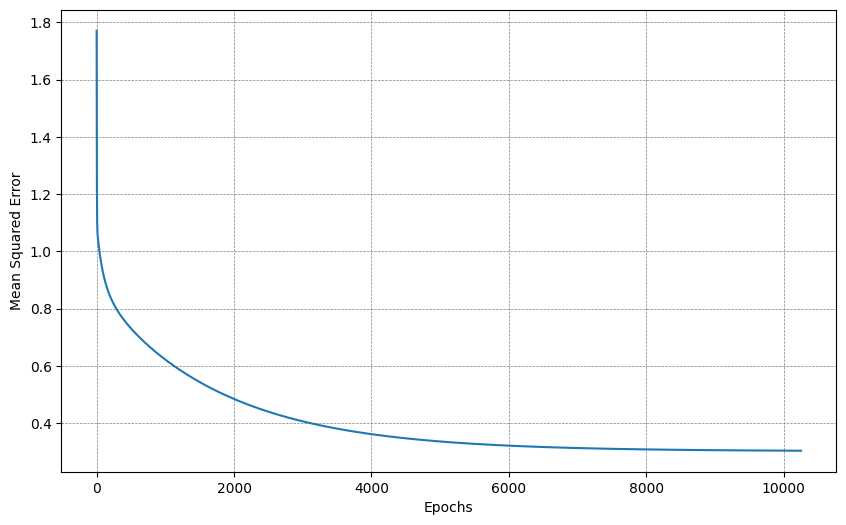

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(errors_list)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')

A partir do gráfico acima, conclui-se que o erro quadrático médio caiu exponencialmente à medida em que o número de épocas aumentava, até convergir para um erro um pouco acima de 0.3. Isso é um bom indicativo de aprendizado do modelo.